<a href="https://colab.research.google.com/github/InSpira4/CS5617-DataScienceProject/blob/sugi/Descriptive_Sugi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Natera-JanFirstWeek.csv');
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,1/7/2019,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


In [0]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [0]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [0]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [0]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'):
    return True
  else:
    return False
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [25]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-22,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-24,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,2019-01-07,2019-02-10,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-28,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-30,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [26]:
df.corr(method ='pearson') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
Charges,1.000000,0.230978,0.224267,0.054464,0.602983,0.337974,0.411184,-0.125417,NaN,0.040090
Payments,0.230978,1.000000,0.987367,0.133075,0.256541,-0.089432,-0.090228,0.308807,NaN,0.326863
Insurance Payment,0.224267,0.987367,1.000000,-0.025644,0.243422,-0.085509,-0.084606,0.311258,NaN,0.315086
Patient Payment,0.054464,0.133075,-0.025644,1.000000,0.095934,-0.029372,-0.040050,0.001367,NaN,0.091338
Writeoffs,0.602983,0.256541,0.243422,0.095934,1.000000,-0.202158,-0.175613,-0.013820,NaN,0.230787
Insurance Bal,0.337974,-0.089432,-0.085509,-0.029372,-0.202158,1.000000,-0.151268,-0.122290,NaN,-0.158679
Patient Bal,0.411184,-0.090228,-0.084606,-0.040050,-0.175613,-0.151268,1.000000,-0.128242,NaN,-0.143436
Allowed Amount,-0.125417,0.308807,0.311258,0.001367,-0.013820,-0.122290,-0.128242,1.000000,NaN,0.351711
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accepted,0.040090,0.326863,0.315086,0.091338,0.230787,-0.158679,-0.143436,0.351711,NaN,1.000000


In [27]:
df.corr(method ='kendall') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
Charges,1.000000,0.047993,0.028629,0.051909,0.287593,0.040812,0.204049,-0.053816,NaN,0.007584
Payments,0.047993,1.000000,0.949179,0.233787,0.364663,-0.234908,-0.224430,0.482303,NaN,0.570710
Insurance Payment,0.028629,0.949179,1.000000,-0.057318,0.337601,-0.224789,-0.207667,0.496471,NaN,0.556898
Patient Payment,0.051909,0.233787,-0.057318,1.000000,0.118146,-0.061537,-0.082451,0.010391,NaN,0.114412
Writeoffs,0.287593,0.364663,0.337601,0.118146,1.000000,-0.394611,-0.147482,0.232751,NaN,0.343458
Insurance Bal,0.040812,-0.234908,-0.224789,-0.061537,-0.394611,1.000000,-0.417806,-0.192651,NaN,-0.244944
Patient Bal,0.204049,-0.224430,-0.207667,-0.082451,-0.147482,-0.417806,1.000000,-0.106647,NaN,-0.103922
Allowed Amount,-0.053816,0.482303,0.496471,0.010391,0.232751,-0.192651,-0.106647,1.000000,NaN,0.413528
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
accepted,0.007584,0.570710,0.556898,0.114412,0.343458,-0.244944,-0.103922,0.413528,NaN,1.000000


In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

In [0]:
def compareColsWithClaimAcceptance(colName):
  yes = []
  no = []
  labels = df[colName].unique()
  count = df
  for label in labels:
      yes.append(df[df[colName] == label].accepted.sum())
      no.append(df[df[colName] == label].accepted.count() - df[df[colName] == label].accepted.sum())
  raw_data = {'labels': labels, 'accepted': yes, 'deineid': no}
  fc_compared = pd.DataFrame(raw_data)
  fc_compared.plot.bar(x='labels', rot=0, figsize=(30,10))
  return labels, yes, no

Compare Descrete varibles with claim acceptance



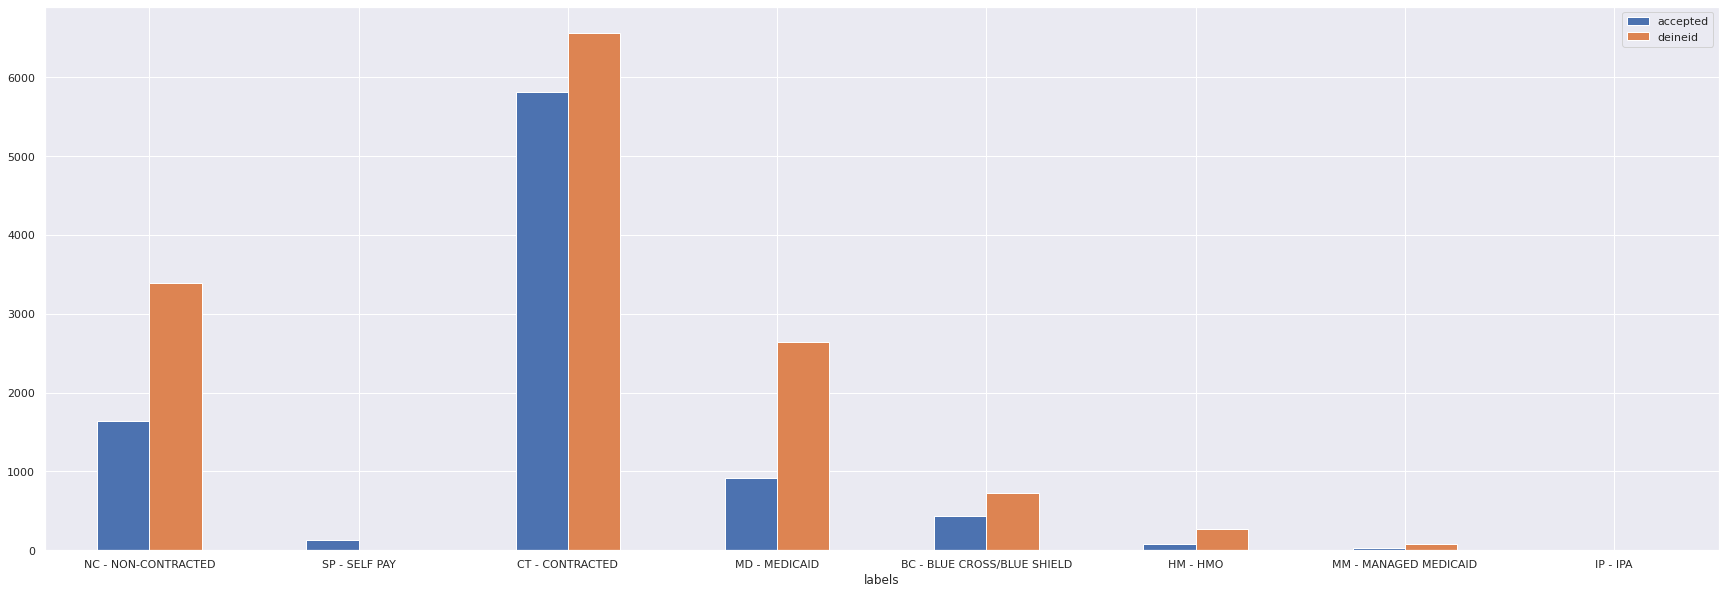

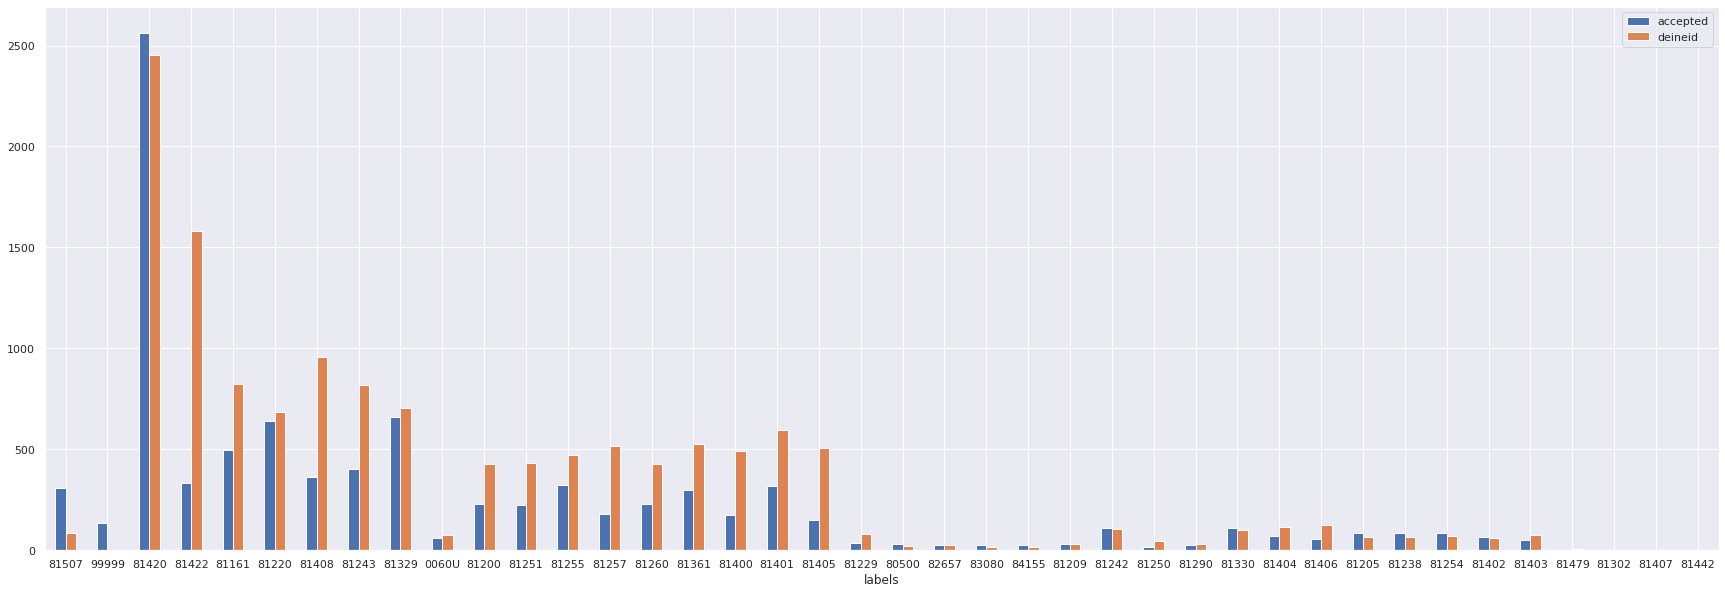

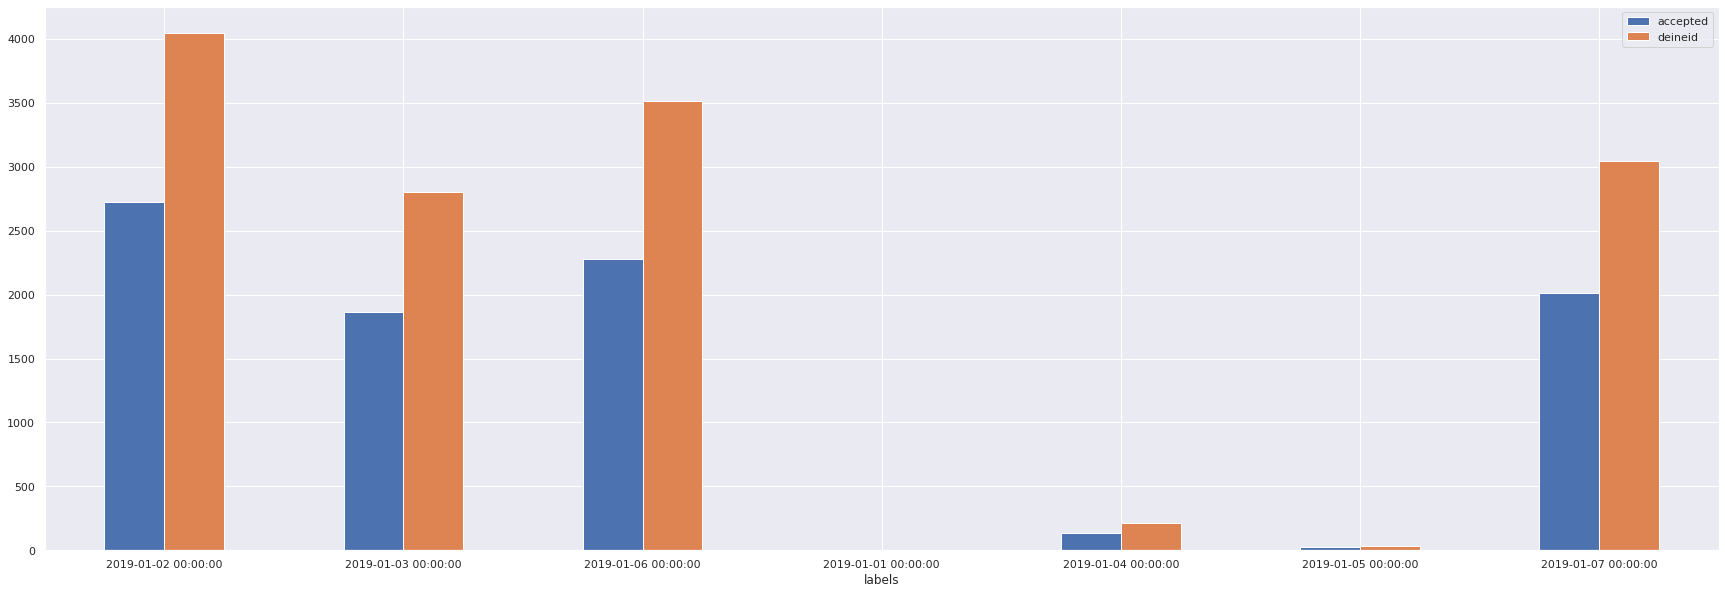

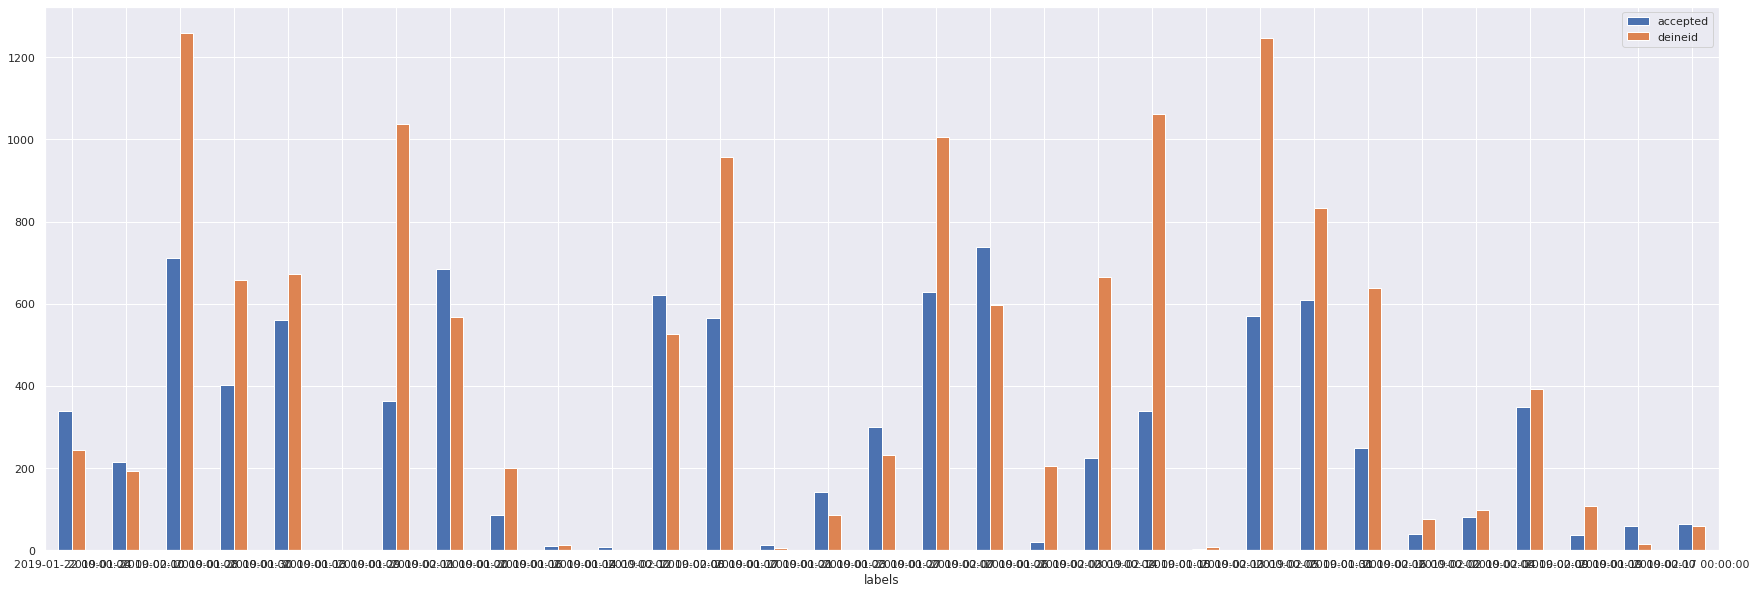

In [41]:
descrete_cols = ['FinancialClass', 'CPT', 'Date of Service', 'Payment Post Date']
for col in descrete_cols:
  compareColsWithClaimAcceptance(col)

We can see some fincial class don't have rejections